The `%matplotlib` magic command is used here to enable plotting in the current notebook. The `inline` backend will embed plots inside the notebook.

In [1]:
%matplotlib inline

#### Import necessary modules

In [2]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

#### Create a file list for the yearly files

In [3]:
file_paths = []
ID = 'AZPG*'
for root, dirs, files in os.walk('../Data/'): 
       file_paths += glob.glob(os.path.join(root, ID))   

#### Read each file and append to previous year

In [4]:
dff = []
for file_path in file_paths:
         df = pd.read_csv(file_path, delim_whitespace = True,  usecols=[0,1,4,5,6], header = None)
         df.columns = ["decday", "pwv",  "P", "T", "RH"]
         lhs, rhs =  file_path.split("_")
         yyy, junk = rhs.split(".")
         yy2 = str(int(yyy)-1)
         prevyear =  yy2 + str('-12-31')
         df['date'] = pd.Timestamp(prevyear)
         df['date'] = df['date'] + pd.to_timedelta(df['decday'], unit ='D')
         dff.append(df)
dff = pd.concat(dff, axis=0)
dff['datetime'] = pd.to_datetime(dff['date'])
dff['month'] = dff['datetime'].dt.month
dff = dff.set_index('datetime')
dff = dff[dff['pwv'] > 0]    # Select valid values

#### We can make a scatter plot to investigate the relationship between temperature and precipitable water

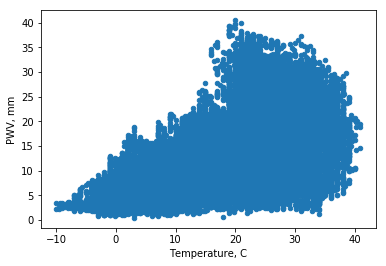

In [5]:
dff.plot(kind='scatter', x='T', y='pwv')
plt.xlabel('Temperature, C')
plt.ylabel('PWV, mm');

#### We can make boxplots of precipitable water by season

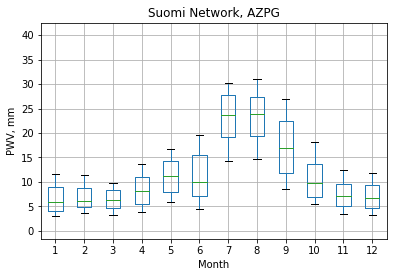

In [6]:
dff.boxplot('pwv', by=dff.month, whis=[10,90], sym=' ')
plt.xlabel('Month')
plt.ylabel('PWV, mm')
plt.title('Suomi Network, AZPG')
plt.suptitle("")
fname='../Figures/PWV_seasonal.pdf'
plt.savefig(fname)

#### Time series plot

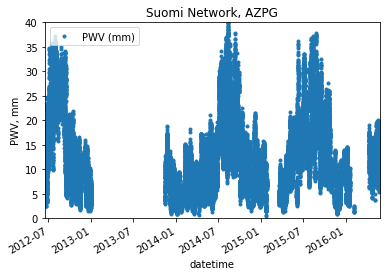

In [7]:
dff.plot(y='pwv', style='.', label='PWV (mm)')
plt.legend(loc='best')
plt.ylabel('PWV, mm')
plt.ylim(ymax=40, ymin =0)
plt.title('Suomi Network, AZPG');

#### Change time axis range

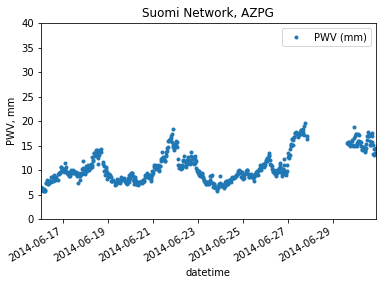

In [8]:
dff2 = (dff.loc['2014-6-16':'2014-6-30'])
dff2.plot(y='pwv',style='.', label='PWV (mm)')
plt.legend(loc='best')
plt.ylabel('PWV, mm')
plt.ylim(ymax=40, ymin =0)
plt.title('Suomi Network, AZPG');

#### Show the statistics

In [9]:
dff.describe(percentiles = [.1,.25,.5])

,decday,pwv,P,T,RH,month
count,37411.000000,37411.000000,37411.000000,37411.000000,37411.000000,37411.000000
mean,205.309484,12.422803,868.188070,17.181845,36.439467,7.239823
std,101.559145,7.763853,4.930508,10.665422,21.556254,3.316288
min,1.385420,0.400000,848.900000,-10.000000,2.200000,1.000000
10%,60.885420,4.300000,862.000000,2.200000,12.100000,3.000000
25%,124.208335,6.500000,865.300000,8.000000,19.400000,5.000000
50%,214.322920,10.100000,868.200000,18.000000,31.600000,8.000000
max,366.989580,40.500000,885.000000,41.000000,100.000000,12.000000
